In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import load_model

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'chest_xray/train'
test_path = 'chest_xray/test'

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

58892288/58889256 [==============================] - 97s 2us/step


In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of classes
folders = glob('chest_xray/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [10]:
# create a model object
model = Model(inputs = vgg.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
# tell the model what cost and optimization method to use
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [22]:
# fit the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
163/163 [==============================] - 555s 3s/step - loss: 0.1835 - accuracy: 0.9258 - val_loss: 0.6366 - val_accuracy: 0.7917
Epoch 2/5
163/163 [==============================] - 604s 4s/step - loss: 0.1179 - accuracy: 0.9540 - val_loss: 0.6268 - val_accuracy: 0.8365
Epoch 3/5
163/163 [==============================] - 618s 4s/step - loss: 0.1114 - accuracy: 0.9605 - val_loss: 0.2994 - val_accuracy: 0.9183
Epoch 4/5
163/163 [==============================] - 631s 4s/step - loss: 0.0763 - accuracy: 0.9701 - val_loss: 0.3317 - val_accuracy: 0.9054
Epoch 5/5
163/163 [==============================] - 639s 4s/step - loss: 0.0957 - accuracy: 0.9670 - val_loss: 0.3490 - val_accuracy: 0.8958


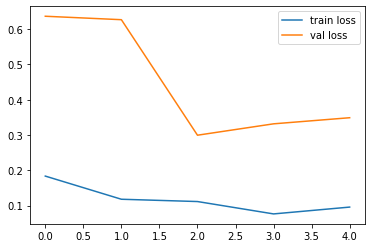

<Figure size 432x288 with 0 Axes>

In [23]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

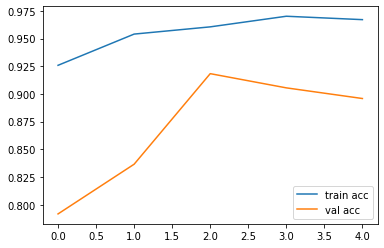

<Figure size 432x288 with 0 Axes>

In [26]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
model.save('model_s_vgg19.h5')